In [160]:
from comp_overrule import learn_srules, learn_s_orules, get_overlap_violations
from comp_overrule_knn import learn_orules as learn_knnrules
from comp_overrule_clr import learn_orules as learn_clrrules

from comp_overrule import plt_cl_lit, plt_sem, get_sem_optim
from utils import rule_str, rules_stats, transcribe, recent_model, read_model
from comp_preprocessing import get_data, get_lbl

from comp_causalmodel import causal_eval, model, bootstrap_effects, placebo_effects

import numpy as np
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
import time

%load_ext autoreload
%autoreload 2

folder = '/home/victora/PositivityViolation/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
np.logspace(-7, -0.1, 10)

array([1.00000000e-07, 5.84341413e-07, 3.41454887e-06, 1.99526231e-05,
       1.16591440e-04, 6.81292069e-04, 3.98107171e-03, 2.32630507e-02,
       1.35935639e-01, 7.94328235e-01])

In [174]:
7.94328235e-01

0.794328235

### Learn support rules

In [168]:
DATA_PATH = folder + 'data/ET_2016_Preprocessed_newT.csv'

In [145]:
modelpath = folder + recent_model('clrmodel')
M, RS_s, RS_o, auc, score_base = learn_s_orules(modelpath, 0.0006812920690579615, 0.0006812920690579615,\
                                                0.0006812920690579615, 0.0006812920690579615, data_path=DATA_PATH, encode=False)

In [152]:
overlap_index_clr, violating_index_clr = get_overlap_violations(RS_s, RS_o, data_path=DATA_PATH, encode=False)
X_df, _, _ = get_data(data_path=DATA_PATH, encode=False)
print(len(overlap_index_clr)/len(X_df))

0.9110526315789473


In [170]:
df = pd.read_csv(DATA_PATH)
len(df)

2726

In [166]:
import pandas as pd
df = pd.read_csv(DATA_PATH)
for col in df.columns:
    print(col, get_lbl(col))

v101 Region
v102 Type of place of residence
v106 Highest educational level
v133 Education in single years
v136 Number of household members (listed)
v137 Number of children 5 and under in household (de jure)
v151 Sex of household head
v155 Literacy
v157 Frequency of reading newspaper or magazine
v158 Frequency of listening to radio
v159 Frequency of watching television
v190 Wealth index combined
v201 Total children ever born
v208 Births in last five years
v209 Births in past year
v215 Time since last menstrual period
v217 Knowledge of ovulatory cycle
v228 Ever had a terminated pregnancy
v301 Knowledge of any method
v313 Current use by method type
v361 Pattern of use
v393 Visited by fieldworker in last 12 months
v394 Visited health facility last 12 months
v501 Current marital status
v502 Currently/formerly/never in union
v513 Cohabitation duration (grouped)
v525 Age at first sex
v536 Recent sexual activity
v605 Desire for more children
v613 Ideal number of children
v623 Exposure
v624 Unm

In [ ]:
results = learn_srules(logspace=10, data_path=DATA_PATH)

 40%|████      | 4/10 [23:26<34:47, 347.89s/it]

(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cdfcad3c8>)

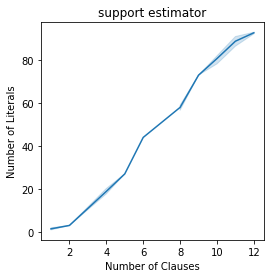

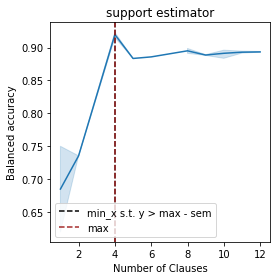

In [176]:
plt_cl_lit(results)
plt_sem(results)

In [9]:
optim = get_sem_optim(results, rtype='support')

### Learn overlap rules

In [10]:
clr_results = learn_clrrules(LAMBDA0_s=optim[4], LAMBDA1_s=optim[5], logspace=10, data_path=DATA_PATH)

100%|██████████| 10/10 [2:26:19<00:00, 877.99s/it]


(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4ce4a73be0>)

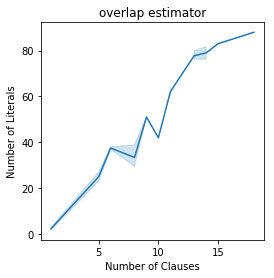

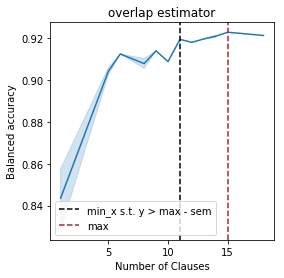

In [11]:
plt_cl_lit(clr_results, rtype='overlap')
plt_sem(clr_results, rtype='overlap')

In [67]:
optim_clr = get_sem_optim(clr_results, rtype='overlap')

In [13]:
knn_results = learn_knnrules(LAMBDA0_s=optim[4], LAMBDA1_s=optim[5], logspace=10, data_path=DATA_PATH)

100%|██████████| 10/10 [39:57<00:00, 239.77s/it]


(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4ce4ab4be0>)

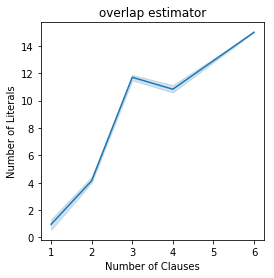

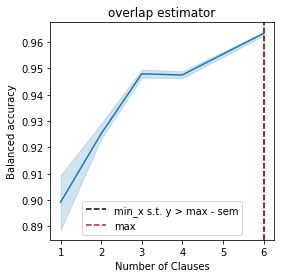

In [14]:
plt_cl_lit(knn_results, rtype='overlap')
plt_sem(knn_results, rtype='overlap')

In [15]:
optim_knn = get_sem_optim(knn_results, rtype='overlap')

### Combined ruleset estimator

In [16]:
X_df, a, y = get_data(DATA_PATH)

In [126]:
modelpath = folder + recent_model('clrmodel')

In [127]:
M, RS_s, RS_o, auc, score_base = learn_s_orules(modelpath, optim[4], optim[5], 0.023263050671536285, 0.0006812920690579615, data_path=DATA_PATH)

In [128]:
stats = rules_stats(RS_s.rules, X_df, a)
transcribe(stats)

[['Region is not "Dire Dawa" and',
  'Region is not "Harari" and',
  'Time since last menstrual period > 207.5 and',
  'Current use by method type is not "Traditional method" and',
  'Recent sexual activity is not "Never had sex"'],
 ['Region is not "Addis Adaba" and',
  'Time since last menstrual period <= 207.5 and',
  'Current use by method type is not "Traditional method" and',
  'Recent sexual activity is not "Never had sex"'],
 ['Region is not "Addis Adaba" and',
  'Region is not "Harari" and',
  'Wealth index combined <= 3.5 and',
  'Current use by method type is not "Traditional method" and',
  'Recent sexual activity is not "Never had sex"'],
 ['Wealth index combined > 3.5 and',
  'Current use by method type is not "Traditional method" and',
  'Recent sexual activity is not "Never had sex"']]

In [129]:
stats = rules_stats(RS_o.rules, X_df, a)
transcribe(stats)

[['Region is not "Gambela" and',
  'Literacy is not "No card with required language" and',
  'Frequency of reading newspaper or magazine <= 0.5 and',
  'Time since last menstrual period <= 699.0 and',
  'Desire for more children is not "Sterilized (respondent or partner)" and',
  'Unmet need is not "Infecund, menopausal"'],
 ['Region is not "Gambela" and',
  'Literacy is not "No card with required language" and',
  'Frequency of reading newspaper or magazine <= 0.5 and',
  'Desire for more children is not "Sterilized (respondent or partner)" and',
  'Unmet need is not "Infecund, menopausal"'],
 ['Highest educational level > 0.5 and',
  'Literacy is not "No card with required language" and',
  'Time since last menstrual period <= 699.0 and',
  'Knowledge of ovulatory cycle is  "Middle of the cycle" and',
  'Age at first sex <= 32.5 and',
  'Desire for more children is not "Sterilized (respondent or partner)"'],
 ['Frequency of reading newspaper or magazine > 0.5 and',
  'Visited by fiel

In [130]:
overlap_index_clr, violating_index_clr = get_overlap_violations(RS_s, RS_o, data_path=DATA_PATH)

In [131]:
modelpath = folder + recent_model('knnmodel')

In [132]:
M, RS_s, RS_o, auc, score_base = learn_s_orules(modelpath, optim[4], optim[5], optim_knn[4], optim_knn[5], data_path=DATA_PATH)

In [133]:
stats = rules_stats(RS_o.rules, X_df, a)
transcribe(stats)

[["Respondent's current age > 26.5 and",
  'Unmet need is not "Using for limiting"'],
 ["Respondent's current age > 26.5 and", 'Region is not "Gambela"'],
 ["Respondent's current age <= 21.5 and",
  'Heard family planning on newspaper/magazine last few months not  and',
  'Unmet need is not "Using for limiting"'],
 ['Education in single years > 8.5 and',
  'Cohabitation duration (grouped) is not "Never married"'],
 ['Region is not "Gambela" and', 'Unmet need is  "Using for limiting"'],
 ['Region is not "Gambela" and',
  'Education in single years <= 8.5 and',
  'Knowledge of ovulatory cycle is not "Don\'t know" and',
  'Age at first sex <= 23.5']]

In [134]:
overlap_index_knn, violating_index_knn = get_overlap_violations(RS_s, RS_o, data_path=DATA_PATH)

In [135]:
print(len(overlap_index_clr)/len(X_df))
print(len(overlap_index_knn)/len(X_df))

0.8664710198092443
0.9046221570066031


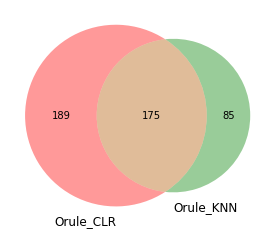

In [136]:
set1 = set(violating_index_clr)
set2 = set(violating_index_knn)

fig, ax = plt.subplots()
venn2([set1, set2], ('Orule_CLR', 'Orule_KNN'), ax=ax)

In [137]:
timestamp = str(int(time.time()))
fig.savefig(folder + 'figures/venn2' + timestamp + '.pdf')

In [139]:
print(violating_index_knn)

[1025, 1026, 1027, 1539, 1029, 1030, 1542, 2052, 521, 1033, 1034, 1545, 1546, 15, 2576, 18, 1044, 1045, 1049, 2074, 2585, 2076, 1053, 33, 545, 1057, 2084, 2597, 551, 552, 1576, 1069, 2606, 559, 2607, 561, 2610, 51, 2615, 571, 576, 1089, 1091, 70, 582, 1610, 1100, 1104, 1105, 598, 2656, 2658, 1125, 1126, 104, 1128, 2152, 107, 1132, 2664, 2158, 1651, 1140, 2675, 1142, 1147, 1148, 637, 125, 2171, 1664, 2173, 2175, 1667, 1668, 1669, 1670, 1159, 2183, 2184, 2690, 1675, 2693, 1679, 1169, 2193, 2705, 150, 2719, 2208, 163, 164, 2723, 166, 167, 680, 169, 170, 682, 172, 173, 686, 684, 1707, 689, 178, 1713, 2220, 2221, 2222, 695, 696, 2224, 2244, 198, 1222, 1223, 2248, 714, 1742, 2687, 1744, 1748, 2688, 214, 1764, 742, 231, 1768, 1259, 1260, 1773, 1774, 751, 1263, 2287, 1266, 2289, 1268, 1269, 246, 1270, 1271, 1275, 1282, 259, 2307, 2309, 774, 1800, 778, 2315, 270, 1806, 1808, 787, 1815, 794, 1819, 796, 797, 2334, 1311, 2336, 1825, 2339, 1318, 2343, 808, 2344, 810, 1326, 815, 2350, 817, 818, 819,